# WORKSHOP 2 - CLASSIFICATION OF POLITICAL US TWEETS

### Context: Presidential Debate 2020
Yes, we are going back in time to the Presidential Debate in the US 2020 - the time of lots of unhappy Tweeting. It’s just too good a dataset and case to let it go…

In [ ]:
# Install Tweet-preprocessor

!pip install tweet-preprocessor -qq

In [ ]:
# Import Pandas and Data

import pandas as pd
data_congress = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/master/M2/data/pol_tweets.gz')
data_congress.head()

,text,labels
340675,RT @GreenBeretFound Today we remember Sgt. 1st...,0
289492,"Yes, yes, yes, yes and yes. 😷 #JerseyStrong 💪🏾...",1
371088,Made new friends this afternoon delivering mas...,1
82212,RT @TXMilitary Happening TODAY: Pilots with th...,0
476047,RT @SteveScalise President Trump's legal team ...,0


In [ ]:
# Import Preprocessor and process Tweets

import preprocessor as prepro
prepro.set_options(prepro.OPT.URL, prepro.OPT.EMOJI, prepro.OPT.NUMBER, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.SMILEY)
prepro.clean('Preprocessor is #awesome 👍 https://github.com/s/preprocessor')

'Preprocessor is #awesome'

In [ ]:
# Clean Data

data_congress['text_clean'] = data_congress['text'].map(lambda t: prepro.clean(t))
data_congress['text_clean'] = data_congress['text_clean'].str.replace('#', '')
data_congress.head()

,text,labels,text_clean
340675,RT @GreenBeretFound Today we remember Sgt. 1st...,0,Today we remember Sgt. st Class Ryan J. Savard...
289492,"Yes, yes, yes, yes and yes. 😷 #JerseyStrong 💪🏾...",1,"Yes, yes, yes, yes and yes. JerseyStrong QT Pr..."
371088,Made new friends this afternoon delivering mas...,1,Made new friends this afternoon delivering mas...
82212,RT @TXMilitary Happening TODAY: Pilots with th...,0,Happening TODAY: Pilots with the Texas Air Gua...
476047,RT @SteveScalise President Trump's legal team ...,0,President Trump's legal team completely destro...


In [ ]:
# Vectorize Data

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)

X = vectorizer.fit_transform(data_congress['text_clean'])
y = data_congress['labels']

In [ ]:
# Split Data into Train and Test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
# Deploy Regression Model

from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Model's score

model.score(X_test, y_test)

0.7484

In [ ]:
# Predict

y_pred = model.predict(X_test)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62006b9110>)

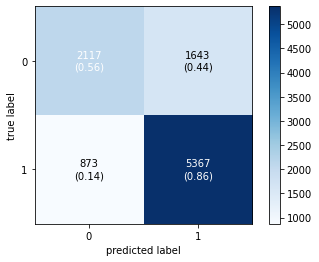

In [ ]:
# Evaluate Model

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confmatrix = confusion_matrix(y_test,y_pred) 

# plotting the confusion matrix
plot_confusion_matrix(conf_mat=confmatrix, colorbar=True, show_absolute=True, show_normed=True)

In [ ]:
# Import the other Dataset

data_tweets = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/master/M2/data/pres_debate_2020.gz')
data_tweets.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,reply_to,translate,trans_src,trans_dest
0,1318944772183281664,1318944772183281664,2020-10-21 15:58:33,2020-10-21 15:58:33,0,,Still time to register: Students can join the ...,en,[presidentialdebate2020],[],1130857348921036802,1130857348921036800,UVADemocracy,UVA Democracy Initiative,3,15,https://twitter.com/UVADemocracy/status/131894...,[https://bit.ly/349NTIU],[https://pbs.twimg.com/media/Ek3UXC1X0AAw47D.png],1,https://pbs.twimg.com/media/Ek3UXC1X0AAw47D.png,2,0,2,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
1,1318938583122743296,1318938583122743296,2020-10-21 15:33:57,2020-10-21 15:33:57,0,,Be prepared for Trump to railroad Thursday’s d...,en,[presidentialdebate2020],[],243363569,243363569,kevinjguest,Kevin Guest,3,15,https://twitter.com/kevinjguest/status/1318938...,[],[],0,,0,0,0,https://twitter.com/donaldjtrumpjr/status/1318...,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
2,1318932554897031168,1318932554897031168,2020-10-21 15:10:00,2020-10-21 15:10:00,0,,Join us tomorrow from 5-8pm as @michaelpleahy ...,en,[presidentialdebate2020],[],26819436,26819436,TalkradioWLAC,Talkradio WLAC,3,15,https://twitter.com/TalkradioWLAC/status/13189...,[https://wlac.iheart.com/calendar/event/5f8df3...,[],0,,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
3,1318928783169245184,1318928783169245184,2020-10-21 14:55:01,2020-10-21 14:55:01,0,,Wanna bet #ProudBoys comes up #PresidentialDeb...,en,"[proudboys, presidentialdebate2020]",[],298018860,298018860,PBPoliticsFins,Antonio Fins,3,14,https://twitter.com/PBPoliticsFins/status/1318...,[https://www.palmbeachpost.com/story/news/2020...,[],0,,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
4,1318927150247018496,1318927150247018496,2020-10-21 14:48:31,2020-10-21 14:48:31,0,,RT College Tour @BelmontUniv was spotless. Gor...,en,"[musiccity, presidentialdebate2020]",[],4159192877,4159192877,12thSouth,12th South,3,14,https://twitter.com/12thSouth/status/131892715...,[],[https://pbs.twimg.com/media/Ek3CBOhXYAIpo8C.j...,1,https://pbs.twimg.com/media/Ek3CBOhXYAIpo8C.jpg,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,


In [ ]:
# Set preprocess function

def tweet_preprocess(tweet):
  prepro_tweets = tweet.map(lambda t: prepro.clean(t))
  prepro_tweets = prepro_tweets.str.replace('#', '')
  prepro_tweets = vectorizer.fit_transform(prepro_tweets)

  return prepro_tweets

In [ ]:
# Apply function to new Dataset

X_new = tweet_preprocess(data_tweets['tweet'])

In [ ]:
# Make predictions for the new X

model.predict_proba(X_new)

array([[0.94979247, 0.05020753],
       [0.5994806 , 0.4005194 ],
       [0.48180845, 0.51819155],
       ...,
       [0.23689575, 0.76310425],
       [0.25840713, 0.74159287],
       [0.32186911, 0.67813089]])

In [ ]:
# Store predictions in a new variable

data_tweets['dem_prob'] = model.predict_proba(X_new)[:, 1]

In [ ]:
# Look at the top predictions

data_tweets.sort_values('dem_prob', ascending=False)['tweet'][:20]

1080    Indictment Shows Russian Interference As ‘Blac...
2447    @realDonaldTrump Here is a photo of co-chairs/...
6124    Trey Gowdy blasts FBI after Trump declassifies...
7493    All the rest of the #PresidentialDebate2020 sh...
6076    Trump strikes back. Declassifies Hillary Clint...
1103    NBC's Kristen Welker: Clinton's Untrustworthy ...
1347    Joe bringing awareness (like he mentioned it) ...
373     An October Full of Surprises - John Rubino #49...
1078    Sarah Huckabee Sanders spanks NBC's Kristen We...
937     Trump had a chance to serve USA well. He faile...
6236    @JoeBiden It is not a problem of recognizing b...
3894    TO YOUR CORNERS: Commission decrees next week'...
648     Set reminder for 2 days #PresidentialDebate202...
7489    Donald Trump has risked the lives of everyone ...
2146    The Total is In! Here Are All of Biden’s 33 Li...
1755    The Real Debate  https://t.co/CjfJ4jhi2E via @...
1209    I was voting for Biden but this changed my min...
6775    Social